#CSC 578 - Class Project, Time Series Kaggle

## Keiland Pullen 
Spring 2022

##GPU Check<br>
Since we are using Google Colab, this will check if GPUs on Google Collab are being used and how many GPUs are being used. If I were using Anaconda, then it would also enable memory growth.

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


## Import Libraries

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


## Data Set Import

Read file into Collab and retrieve its location via file path.

In [ ]:
csv_path = tf.keras.utils.get_file(
 origin='https://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv',
 fname='Metro_Interstate_reduced.csv',
 cache_dir='/content', cache_subdir='sample_data')

csv_path

2719744/2703553 [==============================] - 0s 0us/step


'/content/sample_data/Metro_Interstate_reduced.csv'

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv(csv_path, header=0)  #, index_col=0

**View data:** <br>
Check that the data has loaded correctly, view data values and data index.

In [ ]:
datavalues = df.values
dataindex = df.index

**View data frame head and data frame tail:** <br>
Inspecting and reviewing the data.

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
40570,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
40571,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
40572,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
40573,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
40574,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


**Data statistics:** <br>
Descriptive statistics for the numerical fields, view the mean, std, min, max, etc.

In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474
std,13.816618,48.812640,0.005676,38.683447,1984.772909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


**Drop categorical fields:** <br>
Removing the weather_main and weather_description variables as items such as clouds, sunny and overcast may not be measurables, for now. Removing the holiday variable as there are only a handful of holidays listed in the data.

In [ ]:
df = df.drop(['holiday', 'weather_main', 'weather_description'], axis = 1)

**Data frame index:** <br>
The date_time variable will become the data frame index.

In [ ]:
df.index = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

**Drop date_time field:** <br>
The data_time variable become the index for this data frame.

In [ ]:
df = df.drop(['date_time'], axis = 1)

**Review Data Frame:** <br>
Ensure that the date_time field is the index.

In [ ]:
df[:5]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918


## Plots

**Traffic Volume Distribution** <br>
This plot should display the distribution of the traffic_volume data, but it doesnt seem to be very helpful.

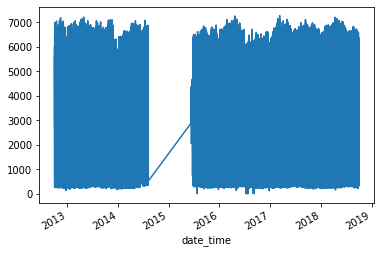

In [ ]:
temp = df['traffic_volume']
temp.plot()


## Splitting the Data <br>

Data set is split into 3 sets.  The training and validation set are a 70/20 split.  The test set is composed of the last 5000 rows from the data frame.

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[-5000:]

num_features = df.shape[1]

In [ ]:
#train_df

In [ ]:
#val_df

In [ ]:
#test_df

## Normalize Data 

The variables of each data set were normalized. 

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
#train_df

In [ ]:
#val_df

In [ ]:
#test_df

## Window Generator
To 

In [ ]:
#
# From TF Tutorial
#

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
#
# From TF Tutorial
#

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
window_5_1_2 = WindowGenerator(input_width=5, label_width=1, shift=2, label_columns=['traffic_volume'] )

In [ ]:
window_5_1_2

Total window size: 7
Input indices: [0 1 2 3 4]
Label indices: [6]
Label column name(s): ['traffic_volume']

##Plots

In [ ]:
#
# From TF Tutorial
#

def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('date _ time')

WindowGenerator.plot = plot

In [ ]:
#
# From TF Tutorial
#


# Stack three slices, the length of the total window.
first_window = tf.stack([np.array(train_df[:window_5_1_2.total_window_size]),
                           np.array(train_df[100:100+window_5_1_2.total_window_size]),
                           np.array(train_df[200:200+window_5_1_2.total_window_size])])

first_inputs, first_labels = window_5_1_2.split_window(first_window)

In [ ]:
window_5_1_2.example = first_inputs, first_labels

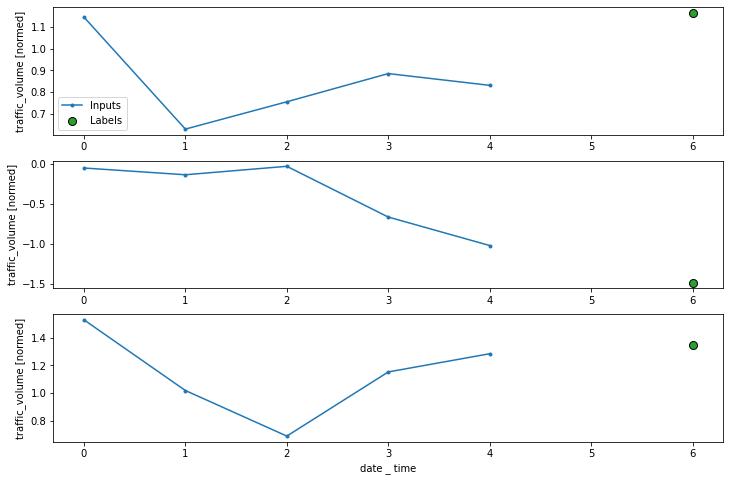

In [ ]:
window_5_1_2.plot()

##Create the Datasets

In [ ]:
#
# From TF Tutorial
#

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=64,)
      #batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
#
# From TF Tutorial
#

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# window_5_1_2.train
# window_5_1_2.val
#window_5_1_2.test


##Data Models

**Baseline Model** <br>
Simple baseline model based on the TF tutorial.

In [ ]:
single_step = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['traffic_volume'])
single_step

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['traffic_volume']

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['traffic_volume'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step.val)
performance['Baseline'] = baseline.evaluate(single_step.test, verbose=0)

127/127 [==============================] - 3s 9ms/step - loss: 0.1713 - mean_absolute_error: 0.2973


In [ ]:
wide_window_5_1_2 = WindowGenerator(
    input_width=24, label_width=24, shift=2,
    label_columns=['traffic_volume'])

wide_window_5_1_2

Total window size: 26
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Label column name(s): ['traffic_volume']

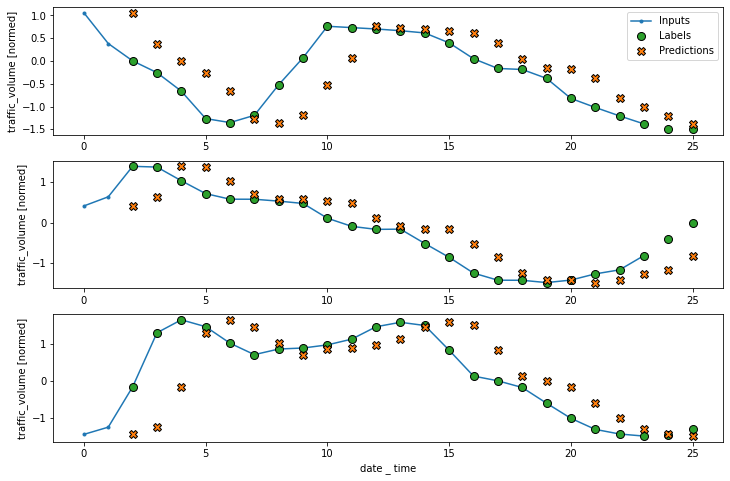

In [ ]:
wide_window_5_1_2.plot(baseline)

In [ ]:
#
# From TF Tutorial
#

MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history


**LSTM Model -- Runner-Up**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    #tf.keras.layers.LSTM(240, return_sequences=True),
    #tf.keras.layers.LSTM(240, return_sequences=True),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128, return_sequences=True),
    #tf.keras.layers.LSTM(512, return_sequences=True),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
history = compile_and_fit(lstm_model, wide_window_5_1_2)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window_5_1_2.val)
performance['LSTM'] = lstm_model.evaluate(wide_window_5_1_2.test, verbose=0)

127/127 [==============================] - 1s 9ms/step - loss: 0.0629 - mean_absolute_error: 0.1541


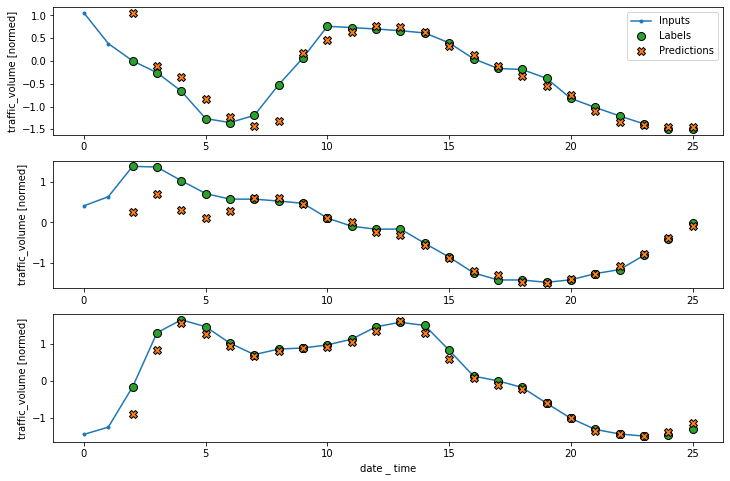

In [ ]:
wide_window_5_1_2.plot(lstm_model)

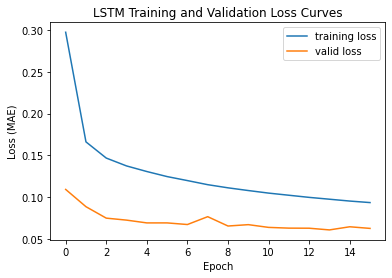

In [ ]:
plt.plot(history.history['loss'], label='training loss') 
plt.plot(history.history['val_loss'], label = 'valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
plt.title('LSTM Training and Validation Loss Curves')
plt.show()

**CNN/RNN Model -- Best Model**



In [ ]:
cnn_rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(256, kernel_size=3, strides=1, padding='same',activation='relu'),
    tf.keras.layers.Conv1D(128,  kernel_size=3, padding='same',activation='relu'),
    #tf.keras.layers.Conv1D(64,  kernel_size=3, padding='same',activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    #tf.keras.layers.LSTM(64, return_sequences=True),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=1)

])

In [ ]:
history = compile_and_fit(cnn_rnn_model, wide_window_5_1_2)

IPython.display.clear_output()
val_performance['CNN_RNN'] = cnn_rnn_model.evaluate(wide_window_5_1_2.val)
performance['CNN_RNN'] = cnn_rnn_model.evaluate(wide_window_5_1_2.test, verbose=0)

127/127 [==============================] - 1s 9ms/step - loss: 0.0038 - mean_absolute_error: 0.0319


Visual plot for cnn_rnn_model

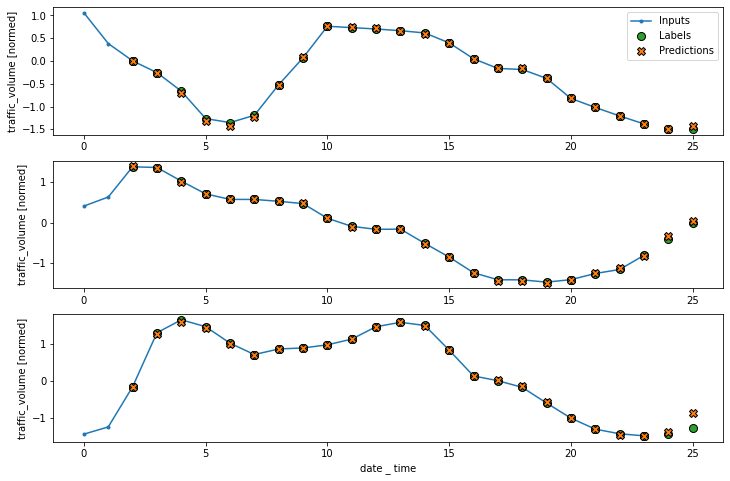

In [ ]:
wide_window_5_1_2.plot(cnn_rnn_model)

CNN_RNN model loss curve

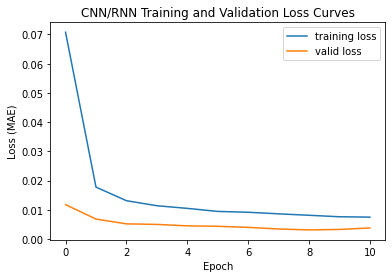

In [ ]:
plt.plot(history.history['loss'], label='training loss') 
plt.plot(history.history['val_loss'], label = 'valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
plt.title('CNN/RNN Training and Validation Loss Curves')
plt.show()

In [ ]:
# x = np.arange(len(val_performance))

# x

##Predictions

**Create predictions based on test set**

In [ ]:
#prediction = lstm_model.predict(window_5_1_2.test)

prediction = cnn_rnn_model.predict(window_5_1_2.test)

In [ ]:
len(prediction)

4994

In [ ]:
prediction.shape, print(type(prediction)), prediction.dtype

#col = pd.DataFrame([prediction], columns=['runs'] )

<class 'numpy.ndarray'>


((4994, 5, 1), None, dtype('float32'))

**Put predictions in single array**

In [ ]:
#prediction[2][4]

i = 0
preds = []
for row in range(0, len(prediction)):
  preds.append(prediction[row][4])

preds

len(preds)


4994

**Denormalize the predictions**

In [ ]:
#denorms = prediction *  train_std + train_mean

train_df_orig = df[0:int(n*0.7)]

new_preds = []
for z in range(0, len(preds)):
  ans = preds[z] * train_df_orig.std() + train_df_orig.mean()
  ans = ans.to_numpy()
  new_preds.append(ans[4])

len(new_preds)

#new_preds

4994

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[-5000:]

num_features = df.shape[1]

##CSV File

**Create and populate .csv file with predictions**

In [ ]:
predict_DF = pd.DataFrame(new_preds)
predict_DF = predict_DF.reset_index()
predict_DF.columns = ('id','prediction')
predict_DF['id'] = predict_DF['id'] + 1
predict_DF.to_csv('predictions.csv', index=False)

**Download .csv file from Google Colab**

In [ ]:
from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>